<div style="background-color:yellow; border: 4px solid blue; border-radius: 2rem; text-align:center; padding-top:1rem; padding-bottom:1rem; ">
    <strong style="font-size: 1.5rem; color:blue;">Digital Assignment</strong><br><br>
    <strong style="font-size: 2rem; color:red;">Autism Prediction Using Different Algorithms</strong><br><br>
    <strong style="font-size: 1.5rem; color:blue;">Name: Soumyadeep Ganguly</strong><br>
    <strong style="font-size: 1.5rem; color:blue;">Reg No: 24MDT0082</strong><br>
</div>




## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv('autism_train.csv')
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

## **Data Preprocessing**

In [4]:
data['age'] = data['age'].astype('int64') 
data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: age
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [5]:
data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

### **Binary Type Columns**

In [6]:
for col in ['gender', 'jaundice', 'austim', 'used_app_before']:
    print(f"{col} --- has {len(data[col].unique())} unique values.")
    for i in data[col].unique():
        print(f"\n{i}")
    
    print("-"*40)

gender --- has 2 unique values.

f

m
----------------------------------------
jaundice --- has 2 unique values.

no

yes
----------------------------------------
austim --- has 2 unique values.

no

yes
----------------------------------------
used_app_before --- has 2 unique values.

no

yes
----------------------------------------


In [7]:
encoder = LabelEncoder()
for col in ['gender', 'jaundice', 'austim', 'used_app_before']:
    data[col] = encoder.fit_transform(data[col])
    print(f"{col} ---- label encoding --- Done")


gender ---- label encoding --- Done
jaundice ---- label encoding --- Done
austim ---- label encoding --- Done
used_app_before ---- label encoding --- Done


In [8]:
data[['gender', 'jaundice', 'austim', 'used_app_before']].head()

,gender,jaundice,austim,used_app_before
0,0,0,0,0
1,1,0,0,0
2,1,0,1,0
3,0,0,0,0
4,1,0,0,0


### **Countries**

In [9]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [10]:
# replace redundant countries
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong": "China"
}

data["contry_of_res"] = data["contry_of_res"].replace(mapping)

In [11]:
data["contry_of_res"] = encoder.fit_transform(data["contry_of_res"])
print(f"{"contry_of_res"} ---- label encoding --- Done")

data["contry_of_res"]

contry_of_res ---- label encoding --- Done


0       6
1      23
2      52
3      52
4      44
       ..
795    34
796    16
797    34
798    14
799    50
Name: contry_of_res, Length: 800, dtype: int64

### **Dropping columns**

In [12]:
data = data.drop(["ID", "age_desc", "ethnicity"], axis = 1)
data.shape

(800, 19)

In [13]:
data.relation = data.relation.replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [14]:
data["relation"] = encoder.fit_transform(data["relation"])
print(f"{"relation"} ---- label encoding --- Done")

data["relation"].unique()

relation ---- label encoding --- Done


array([1, 0])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    int64  
 12  jaundice         800 non-null    int64  
 13  austim           800 non-null    int64  
 14  contry_of_res    800 non-null    int64  
 15  used_app_before  800 non-null    int64  
 16  result           800 non-null    float64
 17  relation        

## **Data Visualizations**

In [16]:
sns.set_theme(style="darkgrid")

In [17]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [18]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,0.662500,0.231250,0.16375,32.558750,0.062500,8.537303,0.886250,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,0.473153,0.421896,0.37028,16.300189,0.242213,4.807676,0.317706,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-6.137748,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.00000,23.000000,0.000000,5.306575,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.00000,33.000000,0.000000,9.605299,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,1.000000,0.000000,0.00000,51.000000,0.000000,12.514484,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,1.000000,1.000000,1.00000,53.000000,1.000000,15.853126,1.000000,1.000000


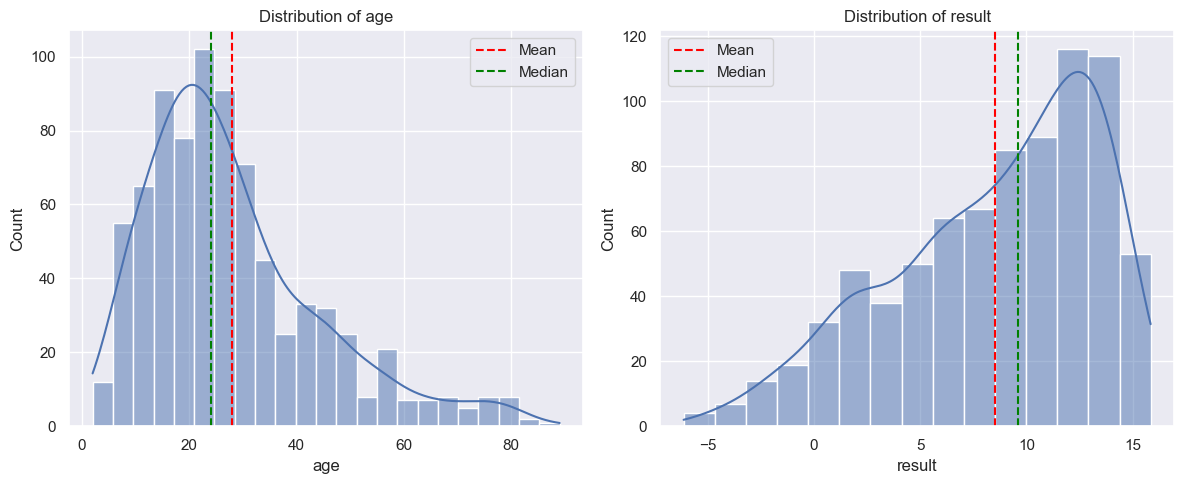

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(['age', 'result']):
    sns.histplot(data[col], kde=True, ax=ax[i])
    ax[i].axvline(data[col].mean(), color="red", linestyle="--", label="Mean")
    ax[i].axvline(data[col].median(), color="green", linestyle="--", label="Median")
    ax[i].set_title(f"Distribution of {col}")
    ax[i].legend()  # Put legend in each subplot

plt.tight_layout()
plt.show()

### **Outliers Detection**

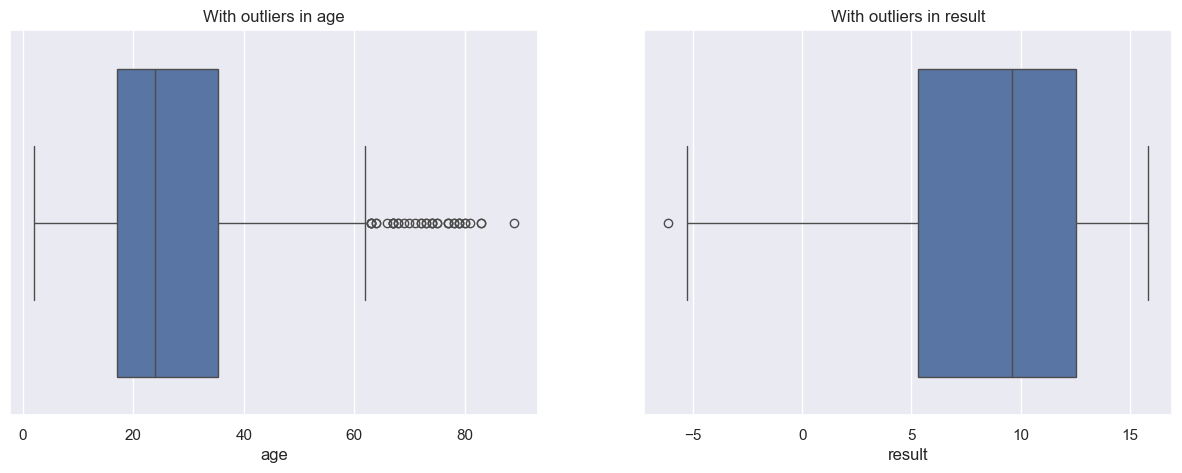

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(x=data.age, ax=axs[0])
axs[0].set_title("With outliers in age")

sns.boxplot(x=data.result, ax=axs[1])
axs[1].set_title("With outliers in result")

plt.show()

In [21]:
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)

IQR = Q3 - Q1

lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

age_outliers = data[(data.age < lb) | (data.age > ub)]
len(age_outliers)

39

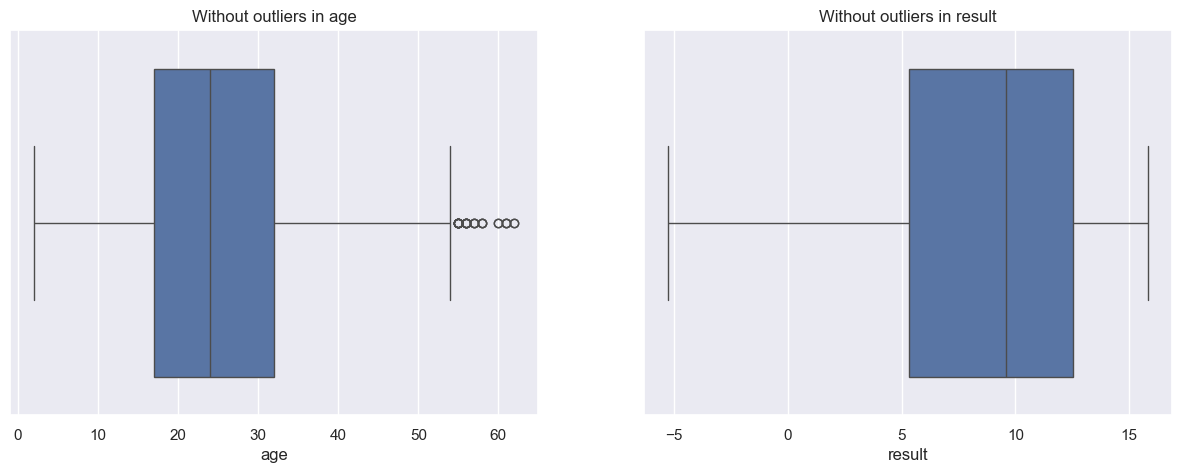

In [22]:
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()

    # replace outliers with median
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

for i in ['age', 'result']:
    data = replace_outliers(data, i)

fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(x=data.age, ax=axs[0])
axs[0].set_title("Without outliers in age")

sns.boxplot(x=data.result, ax=axs[1])
axs[1].set_title("Without outliers in result")

plt.show()

### **Normalize Data**

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.600000,0.0,0.0,0.0,0.113208,0.0,0.550053,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,1.0,0.0,0.0,0.433962,0.0,0.356096,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.083333,1.0,0.0,1.0,0.981132,0.0,0.952569,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350000,0.0,0.0,0.0,0.981132,0.0,0.357111,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.683333,1.0,0.0,0.0,0.830189,0.0,0.023087,1.0,0.0


## **Split the Dataset**

In [24]:
X = data.drop(['Class/ASD'], axis=1)
y = data['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (640, 18)
X_test shape: (160, 18)
y_train shape: (640,)
y_test shape: (160,)


### **Logistic Regression**

In [26]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_predict = LR.predict(X_test)
print(f"Logistic Regression accuracy: {accuracy_score(y_test,LR_predict)}")

Logistic Regression accuracy: 0.875


In [27]:
print(classification_report(y_test, LR_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       124
         1.0       0.75      0.67      0.71        36

    accuracy                           0.88       160
   macro avg       0.83      0.80      0.81       160
weighted avg       0.87      0.88      0.87       160



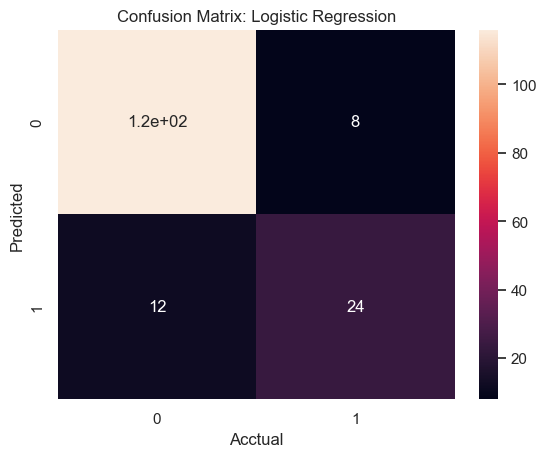

In [28]:
LR_cfm = confusion_matrix(y_test, LR_predict)
sns.heatmap(LR_cfm, annot=True)
plt.xlabel('Acctual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

### **Decision Tree Classifier**

In [29]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_predict = DT.predict(X_test)
print(f"Decison Tree Classifier accuracy: {accuracy_score(y_test,DT_predict)}")

Decison Tree Classifier accuracy: 0.76875


In [30]:
print(classification_report(y_test, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       124
         1.0       0.49      0.53      0.51        36

    accuracy                           0.77       160
   macro avg       0.67      0.68      0.68       160
weighted avg       0.78      0.77      0.77       160



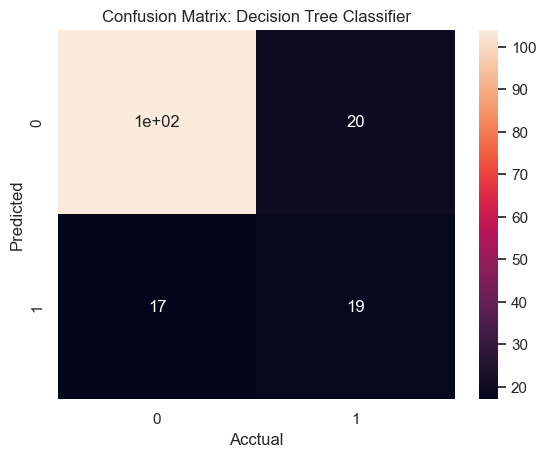

In [31]:
DT_cfm = confusion_matrix(y_test, DT_predict)
sns.heatmap(DT_cfm, annot=True)
plt.xlabel('Acctual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix: Decision Tree Classifier")
plt.show()

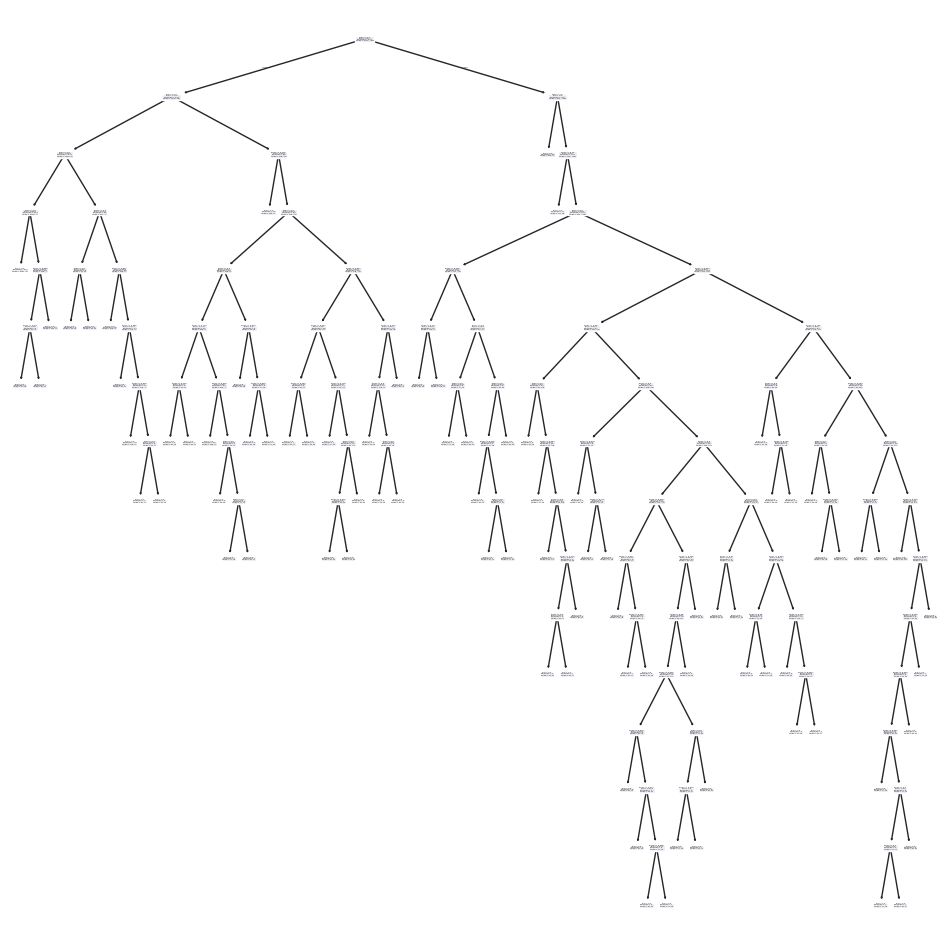

In [32]:
plt.figure(figsize=(12, 12))
plot_tree(DT)
plt.show()

### **Bagging Classifier**

In [33]:
bc_param_grid = {
 'n_estimators':[ 10, 50, 80 ,100, 150, 200, 250, 300]
 }

bc_base_model = BaggingClassifier(random_state=0)
bc_gs = GridSearchCV(estimator = bc_base_model, param_grid = bc_param_grid,cv=5, n_jobs = -1)
bc_gs.fit(X_train, y_train)
print(f'Best parameters for "Bagging Classifier": {bc_gs.best_params_}')
print(f'Best Accuracy: {bc_gs.best_score_}')

Best parameters for "Bagging Classifier": {'n_estimators': 10}
Best Accuracy: 0.8609375


### Training with Optimized parameters

In [34]:
BC = BaggingClassifier(n_estimators = 10, random_state=0)
BC.fit(X_train, y_train)
BC_predict = BC.predict(X_test)
print(f"Bagging Classifier accuracy: {accuracy_score(y_test,BC_predict)}")



Bagging Classifier accuracy: 0.825


In [35]:
print(classification_report(y_test, BC_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       124
         1.0       0.63      0.53      0.58        36

    accuracy                           0.82       160
   macro avg       0.75      0.72      0.73       160
weighted avg       0.82      0.82      0.82       160



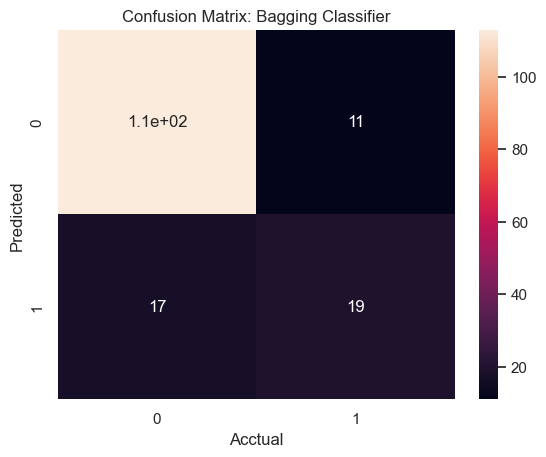

In [36]:
BC_cfm = confusion_matrix(y_test, BC_predict)
sns.heatmap(BC_cfm, annot=True)
plt.xlabel('Acctual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix: Bagging Classifier")
plt.show()

### **RandomForest Classifier**

In [37]:
rfc_base_model = RandomForestClassifier(max_features='sqrt')
rfc_param_grid = {
        'n_estimators':[ 10, 50, 80 ,100, 150, 200, 250, 300],
        'max_depth': [1,2,3,4,10,15,20]
    }
rfc_gs = GridSearchCV(estimator = rfc_base_model, param_grid = rfc_param_grid,cv=5, n_jobs = -1)
rfc_gs.fit(X_train, y_train)

print(f'Best parameters for "Random Forest Classifier": {rfc_gs.best_params_}')
print(f'Best Accuracy: {rfc_gs.best_score_}')

Best parameters for "Random Forest Classifier": {'max_depth': 15, 'n_estimators': 100}
Best Accuracy: 0.8703125


In [38]:
RF = RandomForestClassifier(max_features='sqrt', n_estimators=100, max_depth=15)
RF.fit(X_train, y_train)
RF_predict = RF.predict(X_test)
print(f"RandomForest Classifier accuracy: {accuracy_score(y_test,RF_predict)}")

RandomForest Classifier accuracy: 0.8625


In [39]:
print(classification_report(y_test, RF_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       124
         1.0       0.73      0.61      0.67        36

    accuracy                           0.86       160
   macro avg       0.81      0.77      0.79       160
weighted avg       0.86      0.86      0.86       160



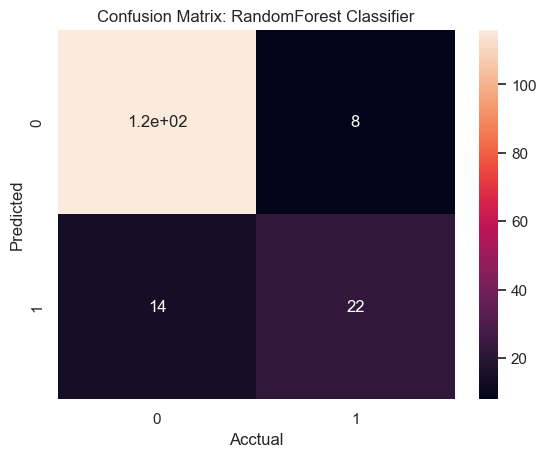

In [40]:
RF_cfm = confusion_matrix(y_test, RF_predict)
sns.heatmap(RF_cfm, annot=True)
plt.xlabel('Acctual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix: RandomForest Classifier")
plt.show()

### **GradientBoosting Classifier**

In [41]:
gbr_base_model =  GradientBoostingClassifier(random_state=0)
gbr_param_grid = {
        'n_estimators':[ 10, 50, 80 ,100, 150, 200, 250, 300],
        'max_depth': [1,2,3,4,10,15,20],
        'learning_rate': [0.01,0.02,0.1,0.05,0.5,0.07,0.9]
    }
gbr_gs = GridSearchCV(estimator = gbr_base_model, param_grid = gbr_param_grid,cv=5, n_jobs = -1)
gbr_gs.fit(X_train, y_train)

print(f'Best parameters for "Gradient Boosting Classifier": {gbr_gs.best_params_}')
print(f'Best Accuracy: {gbr_gs.best_score_}')

Best parameters for "Gradient Boosting Classifier": {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
Best Accuracy: 0.8609375


In [42]:
GB = GradientBoostingClassifier(learning_rate= 0.1, max_depth=1, n_estimators= 200, random_state=0)
GB.fit(X_train, y_train)
GB_predict = GB.predict(X_test)
print(f"GradientBoosting Classifier accuracy: {accuracy_score(y_test,GB_predict)}")


GradientBoosting Classifier accuracy: 0.84375


In [43]:
print(classification_report(y_test, GB_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       124
         1.0       0.68      0.58      0.63        36

    accuracy                           0.84       160
   macro avg       0.78      0.75      0.76       160
weighted avg       0.84      0.84      0.84       160



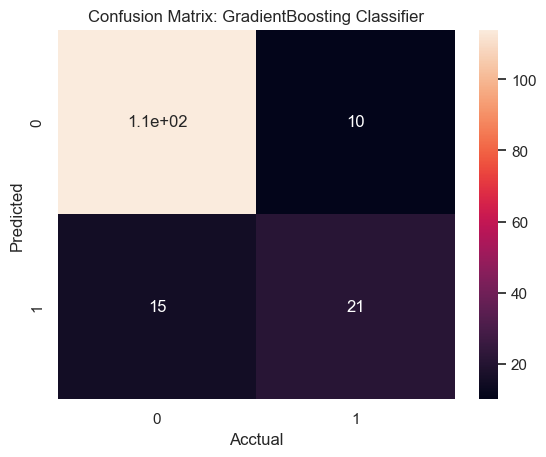

In [44]:
GB_cfm = confusion_matrix(y_test, GB_predict)
sns.heatmap(GB_cfm, annot=True)
plt.xlabel('Acctual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix: GradientBoosting Classifier")
plt.show()

### **AdaBoost Classifier**

In [45]:
ad_base_model =  AdaBoostClassifier(random_state=0)
ad_param_grid = {
        'n_estimators':[ 10, 50, 80 ,100, 150, 200, 250, 300],
        'learning_rate': [0.01,0.02,0.1,0.05,0.5,0.07,0.9]
    }
ad_gs = GridSearchCV(estimator = ad_base_model, param_grid = ad_param_grid,cv=5, n_jobs = -1)
ad_gs.fit(X_train, y_train)

print(f'Best parameters for "AdaBoost Classifier": {ad_gs.best_params_}')
print(f'Best Accuracy: {ad_gs.best_score_}')

Best parameters for "AdaBoost Classifier": {'learning_rate': 0.1, 'n_estimators': 250}
Best Accuracy: 0.865625


In [46]:
AB = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 250, random_state=0)
AB.fit(X_train, y_train)
AB_predict = AB.predict(X_test)
print(f"AdaBoost Classifier accuracy: {accuracy_score(y_test,AB_predict)}")

AdaBoost Classifier accuracy: 0.8625


In [47]:
print(classification_report(y_test, AB_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       124
         1.0       0.75      0.58      0.66        36

    accuracy                           0.86       160
   macro avg       0.82      0.76      0.79       160
weighted avg       0.86      0.86      0.86       160



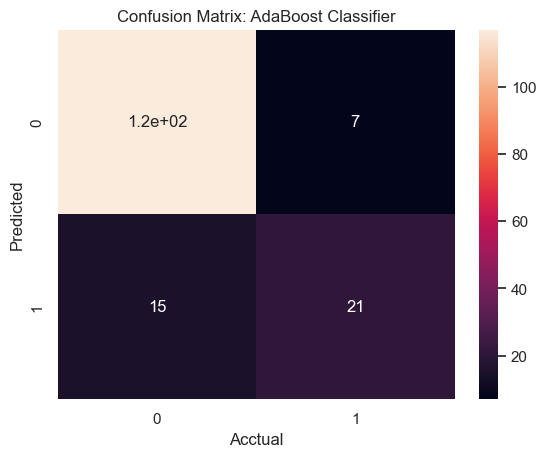

In [48]:
AB_cfm = confusion_matrix(y_test, AB_predict)
sns.heatmap(AB_cfm, annot=True)
plt.xlabel('Acctual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix: AdaBoost Classifier")
plt.show()

## **Result Summery**

In [49]:
results = {
    'Logistic Regression': LR_predict,
    'Decision Tree': DT_predict,
    'RandomForest': RF_predict,
    'Bagging': BC_predict,
    'GradientBoosting': GB_predict,
    'AdaBoostClassifier': AB_predict
}

for classifier, result in results.items():
    print(f"\nAccuracy of {classifier} classifier: {accuracy_score(y_test, result)}\n")
    print('-'*50)



Accuracy of Logistic Regression classifier: 0.875

--------------------------------------------------

Accuracy of Decision Tree classifier: 0.76875

--------------------------------------------------

Accuracy of RandomForest classifier: 0.8625

--------------------------------------------------

Accuracy of Bagging classifier: 0.825

--------------------------------------------------

Accuracy of GradientBoosting classifier: 0.84375

--------------------------------------------------

Accuracy of AdaBoostClassifier classifier: 0.8625

--------------------------------------------------


## **Conclusion: Logistic Regression is giving better result with accuracy score of 0.875**